---------------------------------------------------------------
## II. ANALYSE AVANCÉE DES DONNÉES
--------------------------------------------------------------

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from collections import Counter

from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_dict = set(stopwords.words('english'))
#stop_words_dict est sous forme dict -> également list(stop_words)

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package punkt to /Users/thevault/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thevault/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thevault/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
# Import du jeu de données
df = pd.read_csv('../data/raw/df_full_source.csv')

In [24]:
# On opère la préparation des données

post_initial_id="original_id"
post_content="post"
post_misinformation="misinformation"
post_lemmatized="lemmatized_post"
post_infos="stat_infos"
post_length="length"
post_number_of_words="words"
post_hyperlink_number="hyperlink_number"
post_email_number="email_number"
post_sentiment_score_model = "sentiment_predicted_by_model"
post_sentiment_score_vader = "sentiment_predicted_by_vader"
post_most_common_words="most_common_words"

In [25]:
# On retire la première colonne
df.drop(df.columns[0], axis=1,inplace=True)
# On renomme la deuxième colonne en "original_id"
df.columns.values[0]=post_initial_id
# # On renomme la troisième colonne en "post"
df.columns.values[1]=post_content
# Enfin, on renomme la dernière colonne en "fake_news"
df.columns.values[2]=post_misinformation

---
### 1. Exploration léxicale
---

#### 1.1. Mots primitifs

In [27]:
# On remplace les caractères spéciaux les plus fréquents.
df['post'].str.replace('.', '')
df['post'].str.replace(',', '')
df['post'].str.replace(';', '')
df['post'].str.replace(':', '')
df['post'].str.replace('"', '')
df.head(5)

,original_id,post,misinformation
0,34366,"Local Charlotte, NC news station WSOCTV is rep...",1
1,41656,The tsunami has started President Obama s Keny...,1
2,26726,The only reality show Donald Trump should have...,1
3,81585,"No Food, No FEMA: Hurricane Michael’s Survivor...",0
4,4016,WASHINGTON (Reuters) - Here are some of the hi...,0


In [28]:
# On concatène les textes puis on compte les mots
all_words = ' '.join(df['post']).split(' ') #[liste des mots]
word_counts = Counter(all_words) # dictionnaire {count : word}

In [29]:
print("Nombre de 'mots primitifs' total corpus : ", len(all_words))
print("Nombre de 'mots primitifs uniques : ", len(word_counts))
print("Nombre d'occurences par 'mot primitif' unique : ", (len(all_words)/len(word_counts)))
print("Occurences max :", max(list(word_counts.values())))
print("Occurences min :", min(list(word_counts.values())))

#string le plus long et le plus court
keyMax = list(word_counts.keys())[list(word_counts.values()).index(max(list(word_counts.values())))]
print(keyMax)
keyMin = list(word_counts.keys())[list(word_counts.values()).index(min(list(word_counts.values())))]
print(keyMin)

Nombre de 'mots primitifs' total corpus :  19887218
Nombre de 'mots primitifs uniques :  490667
Nombre d'occurences par 'mot primitif' unique :  40.53098741101399
Occurences max : 936902
Occurences min : 1
the
course.Well,


In [30]:
# On s'intéresse aux mots les plus fréquents
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count']).reset_index()
word_counts_df = word_counts_df.rename(columns={'index': 'word'})
print("number of 'words' :", len(word_counts_df))
word_counts_df.sort_values(by = 'count', ascending = False).head(10)

number of 'words' : 490667


,word,count
99,the,936902
66,to,557891
42,,481655
19,of,457182
21,and,411805
26,a,410396
28,in,345505
8,that,226332
123,on,189352
84,for,178117


In [33]:
# On analyse ensuite la présence de liens HTTP
nbr_http = df[df['post'].str.contains('http')]

#print('Number of records with http string : ', len(nbr_http))
df['http'] = df['post'].str.contains('http').astype(int)
df['http'].value_counts()

http
0    63187
1    39474
Name: count, dtype: int64

Cette analyse préliminaire ne suffisant pas, on va procéder à une analyse à l'aide des "nuages de mots" (word cloud)

#### 1.2. Word clouds

In [34]:
stop_words_french = set(stopwords.words('french'))
stop_words_english = set(stopwords.words('english'))

In [37]:
text_misinformation = " ".join(tqdm(df[df[post_misinformation]==1][post_content],desc="Concaténation des posts de désinformation"))
text_confident = " ".join(tqdm(df[df[post_misinformation]==0][post_content], desc="Concaténation des posts sans désinformation"))
text_whole = text_misinformation + " " + text_confident
word_counts = Counter(text_whole)

Concaténation des posts sans désinformation: 100%|██████████| 67082/67082 [00:00<00:00, 5939171.29it/s]


In [46]:
# Génération des nuages de mots

wordcloud_misinformation = WordCloud(background_color="black",max_words=20, stopwords=stop_words_english, max_font_size=50).generate(text_misinformation)
wordcloud_confident = WordCloud(background_color="black",max_words=20, stopwords=stop_words_english, max_font_size=50).generate(text_confident)
wordcloud_whole = WordCloud(background_color="black",max_words=20, stopwords=stop_words_english, max_font_size=50).generate(text_whole)

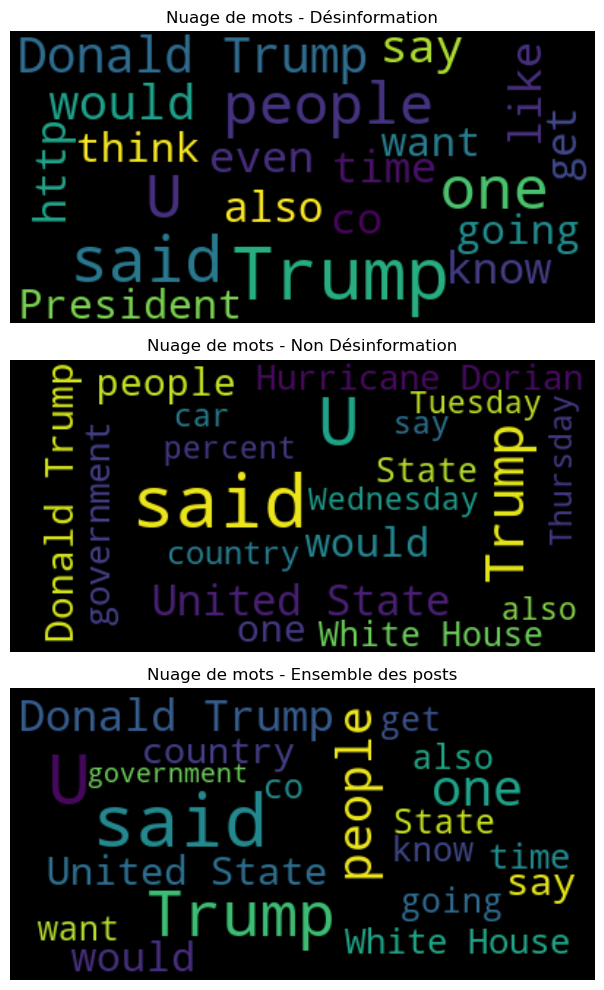

<Figure size 640x480 with 0 Axes>

In [47]:
# Afficher les nuages de mots
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_misinformation, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Désinformation')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_confident, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Non Désinformation')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_whole, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Ensemble des posts')

plt.tight_layout()
plt.show()
plt.savefig("../reports/figures/wordcloud_global.jpg",format="jpg")

Le jeu de données étant consacré à la désinformation centrée sur les États-Unis d'Amériques, les mots les plus fréquents sont relatifs à Donald Trump et à la politique.

---
### 2. Transformation des posts avec NLTK
---

#### 2.1. Usage de la librairie NLTK pour le traitement des données textuelles

In [51]:
# On instancie une liste avec des mots d'arrêt "stop words"
stop_words_dict.update('.',  ';',  ',',  ':',  '"',  '...',  ',',  '?',  '!',  '(',  ')',  '[',  ']')

----------------------------------------------------------
Plan de travail :
1. Tokenizer mots par post
2. Regex si nécessaire (chiffres, n° tél, url ,e-mail ?)
3. supprimer stop words
4. Lemmatisation
5. Fréquences
---------------------------------------------------------------

In [55]:
# On test sur un premier post
#------------------------------------
# Extraction du texte d'un post
post_2_txt = df['post'][2].lower()
print(post_2_txt)

the only reality show donald trump should have ever been featured in is the biggest loser because he just got his ass handed to him in court.two years ago, trump national doral miami golf resort signed a contract worth $200,000 for a local business called the paint spot to provide paint used to renovate the golf course.well, guess who tried to stiff the paint spot of the final $34,863 payment in the deal?yeah, that would be republican nominee donald j. trump.trump and his company refused to honor the contract by not paying the final payment, saying that they ve  paid enough  for the paint. in other words, trump negotiated a deal that ended up costing him more in the end, just like the kinds of deals he wants to negotiate for america with the rest of the world.anyway, paint spot owner juan carlos enriquez filed suit against trump in court, and judge jorge cueto just slapped trump and his company with a $300,000 hit to cover the paint shop s attorney and court fees, nearly ten times more

In [56]:
# Tokenisation
post_2_token = word_tokenize(post_2_txt, language='english')
print(post_2_token)
len(post_2_token)

['the', 'only', 'reality', 'show', 'donald', 'trump', 'should', 'have', 'ever', 'been', 'featured', 'in', 'is', 'the', 'biggest', 'loser', 'because', 'he', 'just', 'got', 'his', 'ass', 'handed', 'to', 'him', 'in', 'court.two', 'years', 'ago', ',', 'trump', 'national', 'doral', 'miami', 'golf', 'resort', 'signed', 'a', 'contract', 'worth', '$', '200,000', 'for', 'a', 'local', 'business', 'called', 'the', 'paint', 'spot', 'to', 'provide', 'paint', 'used', 'to', 'renovate', 'the', 'golf', 'course.well', ',', 'guess', 'who', 'tried', 'to', 'stiff', 'the', 'paint', 'spot', 'of', 'the', 'final', '$', '34,863', 'payment', 'in', 'the', 'deal', '?', 'yeah', ',', 'that', 'would', 'be', 'republican', 'nominee', 'donald', 'j.', 'trump.trump', 'and', 'his', 'company', 'refused', 'to', 'honor', 'the', 'contract', 'by', 'not', 'paying', 'the', 'final', 'payment', ',', 'saying', 'that', 'they', 've', 'paid', 'enough', 'for', 'the', 'paint', '.', 'in', 'other', 'words', ',', 'trump', 'negotiated', 'a',

392

In [57]:
# Suppression des stopwords de ce post
post_2_sans_stopw = [ word for word in post_2_token if word not in list(stop_words_dict) ]
print('longeur brute tokenizée :', len(post_2_token))
print('longeur sans stopwords :', len(post_2_sans_stopw))
print(post_2_sans_stopw)

longeur brute tokenizée : 392
longeur sans stopwords : 198
['reality', 'show', 'donald', 'trump', 'ever', 'featured', 'biggest', 'loser', 'got', 'ass', 'handed', 'court.two', 'years', 'ago', 'trump', 'national', 'doral', 'miami', 'golf', 'resort', 'signed', 'contract', 'worth', '$', '200,000', 'local', 'business', 'called', 'paint', 'spot', 'provide', 'paint', 'used', 'renovate', 'golf', 'course.well', 'guess', 'tried', 'stiff', 'paint', 'spot', 'final', '$', '34,863', 'payment', 'deal', 'yeah', 'would', 'republican', 'nominee', 'donald', 'j.', 'trump.trump', 'company', 'refused', 'honor', 'contract', 'paying', 'final', 'payment', 'saying', 'paid', 'enough', 'paint', 'words', 'trump', 'negotiated', 'deal', 'ended', 'costing', 'end', 'like', 'kinds', 'deals', 'wants', 'negotiate', 'america', 'rest', 'world.anyway', 'paint', 'spot', 'owner', 'juan', 'carlos', 'enriquez', 'filed', 'suit', 'trump', 'court', 'judge', 'jorge', 'cueto', 'slapped', 'trump', 'company', '$', '300,000', 'hit', 'c

In [59]:
# Racinisation du post
#------------------------------------------------------
from nltk.stem.snowball import EnglishStemmer

# Création un stemmer
stemmer = EnglishStemmer()

def stemming(post_sans_stop) :
    liste_stemmee = []
    for word in post_sans_stop :
        radical = stemmer.stem(word)
        liste_stemmee.append(radical)
    return liste_stemmee

# Application la fonction stemming à la variable tokens
post_2_stemm = stemming(post_2_sans_stopw)
post_2_stemm

['realiti',
 'show',
 'donald',
 'trump',
 'ever',
 'featur',
 'biggest',
 'loser',
 'got',
 'ass',
 'hand',
 'court.two',
 'year',
 'ago',
 'trump',
 'nation',
 'doral',
 'miami',
 'golf',
 'resort',
 'sign',
 'contract',
 'worth',
 '$',
 '200,000',
 'local',
 'busi',
 'call',
 'paint',
 'spot',
 'provid',
 'paint',
 'use',
 'renov',
 'golf',
 'course.wel',
 'guess',
 'tri',
 'stiff',
 'paint',
 'spot',
 'final',
 '$',
 '34,863',
 'payment',
 'deal',
 'yeah',
 'would',
 'republican',
 'nomine',
 'donald',
 'j.',
 'trump.trump',
 'compani',
 'refus',
 'honor',
 'contract',
 'pay',
 'final',
 'payment',
 'say',
 'paid',
 'enough',
 'paint',
 'word',
 'trump',
 'negoti',
 'deal',
 'end',
 'cost',
 'end',
 'like',
 'kind',
 'deal',
 'want',
 'negoti',
 'america',
 'rest',
 'world.anyway',
 'paint',
 'spot',
 'owner',
 'juan',
 'carlo',
 'enriquez',
 'file',
 'suit',
 'trump',
 'court',
 'judg',
 'jorg',
 'cueto',
 'slap',
 'trump',
 'compani',
 '$',
 '300,000',
 'hit',
 'cover',
 'paint',

##### Étapes pour Analyser et Transformer les Posts

1. **Lemmatiser chaque post :**  
   - Appliquer un lambda ou une fonction `stemm_column` pour chaque post.
     - a. Convertir le texte en minuscules : `post_txt[i] = df_nltk['text'][i].lower()`
     - b. Tokeniser le texte : `post_token[i] = word_tokenize(post_txt[i], language='french')`
     - c. Retirer les mots vides (stopwords) : `post_sans_stopw[i] = [word for word in post_token[i] if word not in list(stop_words_dict)]`
     - d. Appliquer le stemming sur les mots restants : `post_2_stemm[i] = stemming(post_sans_stopw[i])`

2. **Compter la longueur de chaque post :**  
   - Utiliser `len(tokenize)` pour calculer la longueur de chaque post et ajouter une colonne.

3. **Calculer la fréquence de chaque radical dans chaque post :**  
   - Utiliser `Counter` pour créer une colonne contenant un dictionnaire de fréquence des radicaux.

4. **Calculer la fréquence de chaque radical dans l'ensemble des textes :**  
   - Concaténer les posts ou utiliser une matrice (index x dictionnaire).

5. **Vérifier certaines tendances par rapport aux fake news et/ou aux liens :**  
   - Analyser les tendances observées en fonction des contenus des posts.



On va appliquer ce processus sur l'ensemble des données

In [63]:
def stemm_column(post) :
    post_lower = post.lower()
    post_token = word_tokenize(post_lower, language='english')
    post_sans_stop = [ word for word in post_token if word not in list(stop_words_dict) ]
    post_stemmed = stemming(post_sans_stop)
    return post_stemmed

df['stemmed'] = df['post'].apply(lambda x : stemm_column(x) )

In [64]:
# Affichage des 5 premières lignes du résultat
df.head(10)

,original_id,post,misinformation,http,stemmed
0,34366,"Local Charlotte, NC news station WSOCTV is rep...",1,0,"[local, charlott, nc, news, station, wsoctv, r..."
1,41656,The tsunami has started President Obama s Keny...,1,0,"[tsunami, start, presid, obama, kenyan, half-b..."
2,26726,The only reality show Donald Trump should have...,1,0,"[realiti, show, donald, trump, ever, featur, b..."
3,81585,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f..."
4,4016,WASHINGTON (Reuters) - Here are some of the hi...,0,0,"[washington, reuter, -, highlight, reuter, int..."
5,22321,House Speaker Paul Ryan finally admitted the r...,1,0,"[hous, speaker, paul, ryan, final, admit, reas..."
6,27661,Donald Trump just can t accept that he has com...,1,0,"[donald, trump, accept, complet, demolish, cha..."
7,82666,Would-be looter in Hurricane Michael-ravaged F...,0,1,"[would-b, looter, hurrican, michael-ravag, flo..."
8,76637,His argument is correct. Hurricane Rita killed...,0,0,"[argument, correct, hurrican, rita, kill, 100,..."
9,32898,"At around the 4:00 mark in the video, Maxine p...",1,0,"[around, 4:00, mark, video, maxin, point, obam..."


#### 2.2. Analyse des résultats

In [69]:
# Récupération des longeurs en token de chaque post
df['stem_length']=df['stemmed'].apply(lambda x : len(x) )

print("Nombre total de token dans l'ensemble du corpus :", df['stem_length'].sum())
print("Env. la moitié par rapport à la première version 'à l'ancienne'")

Nombre total de token dans l'ensemble du corpus : 11756092
Env. la moitié par rapport à la première version 'à l'ancienne'


In [71]:
# Counter : fréquence de chaque token dans chaque post.

df['word_count'] = df['stemmed'].apply(lambda x : Counter(x) )
df.head(5)

,original_id,post,misinformation,http,stemmed,stem_length,word_count
0,34366,"Local Charlotte, NC news station WSOCTV is rep...",1,0,"[local, charlott, nc, news, station, wsoctv, r...",237,"{'local': 1, 'charlott': 3, 'nc': 1, 'news': 1..."
1,41656,The tsunami has started President Obama s Keny...,1,0,"[tsunami, start, presid, obama, kenyan, half-b...",159,"{'tsunami': 1, 'start': 1, 'presid': 2, 'obama..."
2,26726,The only reality show Donald Trump should have...,1,0,"[realiti, show, donald, trump, ever, featur, b...",198,"{'realiti': 1, 'show': 1, 'donald': 2, 'trump'..."
3,81585,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",9,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael..."
4,4016,WASHINGTON (Reuters) - Here are some of the hi...,0,0,"[washington, reuter, -, highlight, reuter, int...",523,"{'washington': 1, 'reuter': 2, '-': 4, 'highli..."


In [72]:
# Counter : fréquence de chaque token dans l'ensemble du corpus (sur 50 lignes).

df_count_test = df.head(50)
Compteur_corpus = df_count_test['word_count'].sum()
Compteur_corpus

print("Fréquence de chaque token dans l'ensemble du corpus (sur head de 50 lignes)")

Fréquence de chaque token dans l'ensemble du corpus (sur head de 50 lignes)


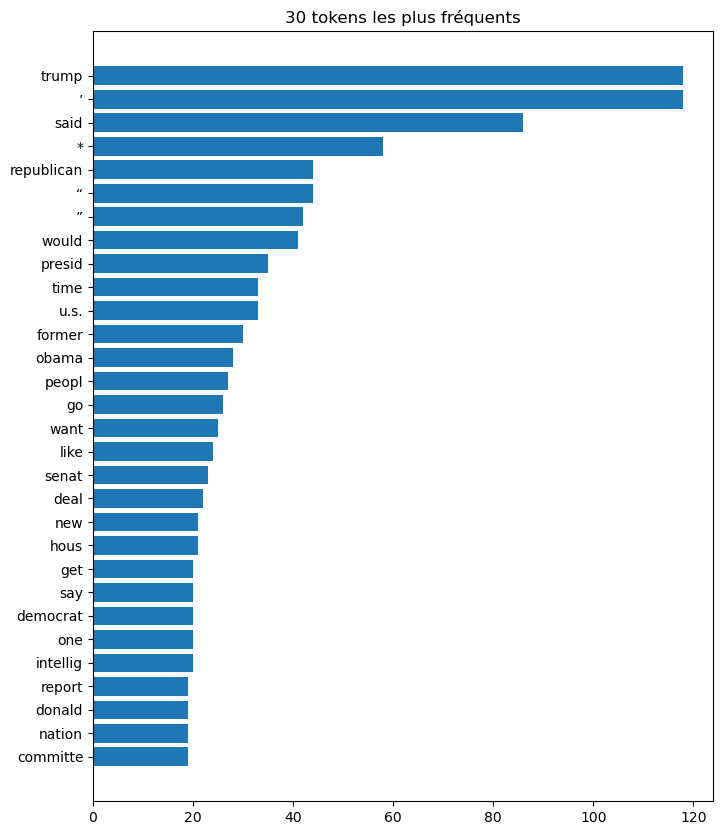

In [73]:
# Counter : chart fréquence de chaque token dans l'ensemble du corpus (sur 50 lignes).

Compteur_corpus.most_common(15)
mots30 = [key[0] for key in Compteur_corpus.most_common(30)]
freq30 = [value[1] for value in Compteur_corpus.most_common(30)]

import matplotlib.pyplot as plt
plt.figure(figsize = (8,10))
plt.barh(mots30,freq30)
plt.gca().invert_yaxis()
plt.title('30 tokens les plus fréquents');

---
#### 2.3. Analyse d'un exemple particulier : "No Food, No FEMA: Hurricane Michael"
---

In [76]:
# Nb appartions 'string' : colonne 'string'

string = 'No Food, No FEMA: Hurricane Michael'

df['string'] = df['post'].apply(lambda x : 1 if string in x else 0)
print(f"Nombre de posts avec au moins une occurence '{string}' :", df['string'].sum())

Nombre de posts avec au moins une occurence 'No Food, No FEMA: Hurricane Michael' : 1393


In [82]:
# Récupéation et affichages des 5 premières et dernières lignes contenant la chaîne de caractère analysée.

df[df['post'].str.contains(string)]
display(df[df['post'].str.contains(string)].head())
display(df[df['post'].str.contains(string)].tail())

,original_id,post,misinformation,http,stemmed,stem_length,word_count,string
3,81585,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",9,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
120,81203,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",12,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
240,79433,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",16,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
352,79147,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",16,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
359,81625,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",10,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1


,original_id,post,misinformation,http,stemmed,stem_length,word_count,string
102116,80426,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",16,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
102194,80783,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",10,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
102252,81359,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",13,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
102298,81452,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",13,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1
102332,81387,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",13,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1


---
### 3. Analyse des sentiments
---

#### 3.1. Utilisation de VADER

In [88]:
# Initialisation de l'utilitaire d'analyse VADER
sia = SentimentIntensityAnalyzer()

In [91]:
# Application sur le jeu de données
df[post_sentiment_score_vader] = df[post_content].apply(lambda x: sia.polarity_scores(x)['compound'])

In [92]:
# Vérification des scores d'analyse de sentiment
print('The statistics for sentiment analysis are:\n', df[post_sentiment_score_vader].describe())

# Affichage des 20 premières lignes du résultat
display(df.head(20))

The statistics for sentiment analysis are:
 count    102661.000000
mean         -0.026754
std           0.670880
min          -1.000000
25%          -0.672600
50%           0.000000
75%           0.585900
max           1.000000
Name: sentiment_predicted_by_vader, dtype: float64


,original_id,post,misinformation,http,stemmed,stem_length,word_count,string,sentiment_predicted_by_vader
0,34366,"Local Charlotte, NC news station WSOCTV is rep...",1,0,"[local, charlott, nc, news, station, wsoctv, r...",237,"{'local': 1, 'charlott': 3, 'nc': 1, 'news': 1...",0,-0.9891
1,41656,The tsunami has started President Obama s Keny...,1,0,"[tsunami, start, presid, obama, kenyan, half-b...",159,"{'tsunami': 1, 'start': 1, 'presid': 2, 'obama...",0,0.9636
2,26726,The only reality show Donald Trump should have...,1,0,"[realiti, show, donald, trump, ever, featur, b...",198,"{'realiti': 1, 'show': 1, 'donald': 2, 'trump'...",0,0.8334
3,81585,"No Food, No FEMA: Hurricane Michael’s Survivor...",0,1,"[food, fema, hurrican, michael, ’, survivor, f...",9,"{'food': 1, 'fema': 1, 'hurrican': 1, 'michael...",1,-0.7964
4,4016,WASHINGTON (Reuters) - Here are some of the hi...,0,0,"[washington, reuter, -, highlight, reuter, int...",523,"{'washington': 1, 'reuter': 2, '-': 4, 'highli...",0,-0.7326
5,22321,House Speaker Paul Ryan finally admitted the r...,1,0,"[hous, speaker, paul, ryan, final, admit, reas...",197,"{'hous': 1, 'speaker': 2, 'paul': 1, 'ryan': 4...",0,0.9716
6,27661,Donald Trump just can t accept that he has com...,1,0,"[donald, trump, accept, complet, demolish, cha...",203,"{'donald': 2, 'trump': 13, 'accept': 1, 'compl...",0,0.9699
7,82666,Would-be looter in Hurricane Michael-ravaged F...,0,1,"[would-b, looter, hurrican, michael-ravag, flo...",21,"{'would-b': 1, 'looter': 2, 'hurrican': 1, 'mi...",0,-0.8398
8,76637,His argument is correct. Hurricane Rita killed...,0,0,"[argument, correct, hurrican, rita, kill, 100,...",11,"{'argument': 1, 'correct': 1, 'hurrican': 1, '...",0,-0.8979
9,32898,"At around the 4:00 mark in the video, Maxine p...",1,0,"[around, 4:00, mark, video, maxin, point, obam...",120,"{'around': 2, '4:00': 2, 'mark': 2, 'video': 1...",0,0.9129


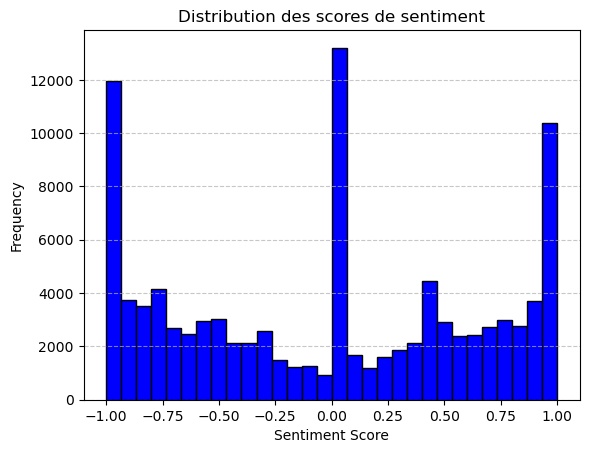

In [95]:
# Affichage de la distribution des scores de sentiment
plt.hist(df[post_sentiment_score_vader], bins=30, edgecolor='black', color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution des scores de sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

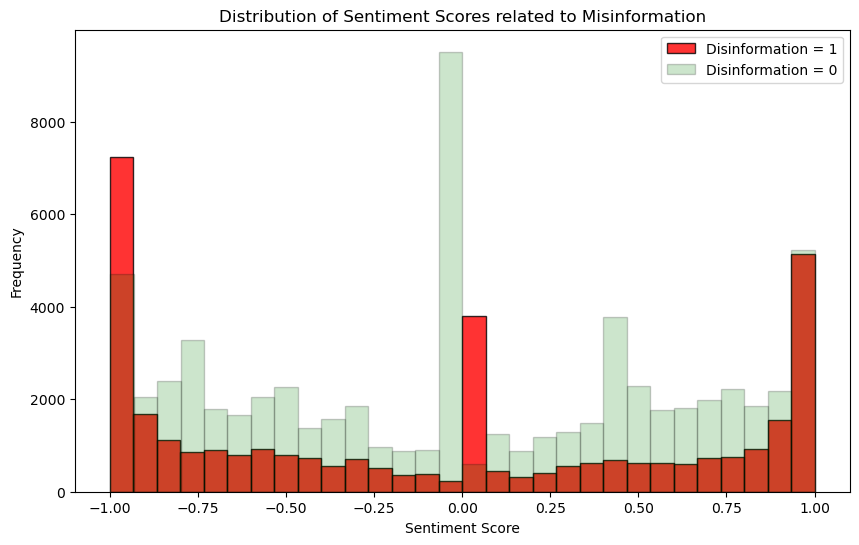

<Figure size 640x480 with 0 Axes>

In [97]:
# On filtre les données pour les séparer en deux groupes puis un créer un histogramme pour chaque groupe
fake_news = df[df[post_misinformation] == 1][post_sentiment_score_vader]
true_news = df[df[post_misinformation] == 0][post_sentiment_score_vader]

plt.figure(figsize=(10, 6))
plt.hist(fake_news, bins=30, alpha=0.8, color='red', edgecolor='black', label='Disinformation = 1')
plt.hist(true_news, bins=30, alpha=0.2, color='green', edgecolor='black', label='Disinformation = 0')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores related to Misinformation')
plt.legend()

plt.show()
plt.savefig("../reports/figures/sentiment_vader_misinformation.jpg",format="jpg")